# Global sea level budget
Check how the components add up

In [60]:
import sys
sys.path.append('../code')
import importlib

import numpy as np
import xarray as xr
import pandas as pd
import matplotlib.pyplot as plt
import cftime

import SeaLevelContrib as slc


In [79]:
importlib.reload(slc)

<module 'SeaLevelContrib' from '/Users/dewi/Work/Project_SeaLevelBudgets/Notebooks/SeaLevelContrib.py'>

In [2]:
def deep_steric_PJ10(first_year, last_year):
    '''Deep ocean bellow 2000m contribution to global mean sea level in cm/year,
    from Purkey and Johnson 0.1mm/year'''
    
    deep_steric = (np.arange(first_year,last_year) - first_year)*0.01
    deep_steric_df = pd.DataFrame(data={'time':np.arange(first_year,last_year), 
                                        'deep_steric':deep_steric})
    deep_steric_df = deep_steric_df.set_index('time')
    return deep_steric_df

<AxesSubplot:xlabel='time'>

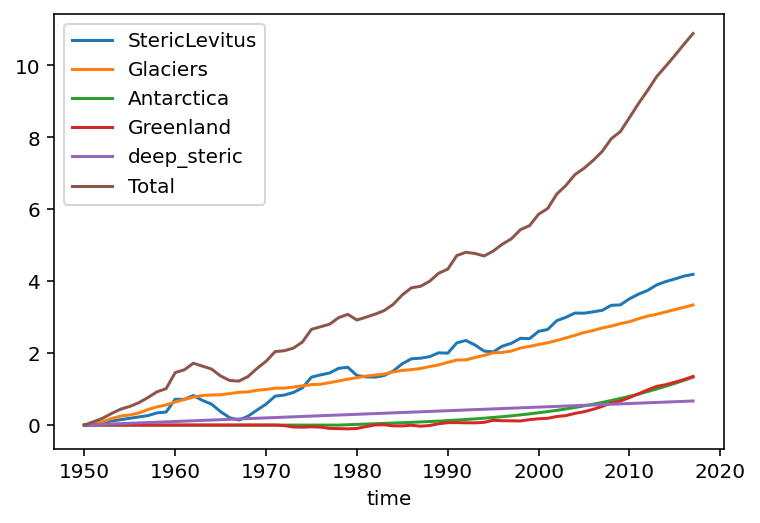

In [4]:
GloSLDang19_df = slc.GloSLDang19()

glac_df = slc.glaciers_m15(tg_id = None, extrap=True, del_green=True)
ant_df = slc.ant_rignot19()  #imbie or rignot19
#ant_df = slc.ant_imbie_glo(extrap=True) 
green_df = slc.green_mouginot19_glo()
tws_df = slc.tws_glo_humphrey19()

deep_steric_df = deep_steric_PJ10(1950, 2020)

sealevel_df = slc.LevitusSL(extrap_back = True)
# Extrapollate to 1950?
#sealevel_df = sealevel_df.join([glac_df, ant_df, green_df, tws_df], how='inner')
sealevel_df = sealevel_df.join([glac_df, ant_df, green_df, deep_steric_df], how='inner')
sealevel_df = sealevel_df - sealevel_df.loc[1950]

sealevel_df['Total'] = sealevel_df.sum(axis=1)
sealevel_df.index.names = ['time']

sealevel_df.plot()

In [19]:
sealevel_df

,StericLevitus,Glaciers,Antarctica,Greenland,deep_steric,Total
time,,,,,,
1950,0.000000,0.000000,0.000000,0.000000,0.00,0.000000
1951,0.037695,0.044387,0.000000,0.000000,0.01,0.092082
1952,0.075390,0.093377,0.000000,0.000000,0.02,0.188766
1953,0.113085,0.180265,0.000000,0.000000,0.03,0.323350
1954,0.150780,0.251949,0.000000,0.000000,0.04,0.442728
...,...,...,...,...,...,...
2013,3.899132,3.082162,1.004522,1.077000,0.63,9.692816
2014,3.990814,3.146930,1.080473,1.123139,0.64,9.981356
2015,4.064255,3.211698,1.160647,1.192972,0.65,10.279572


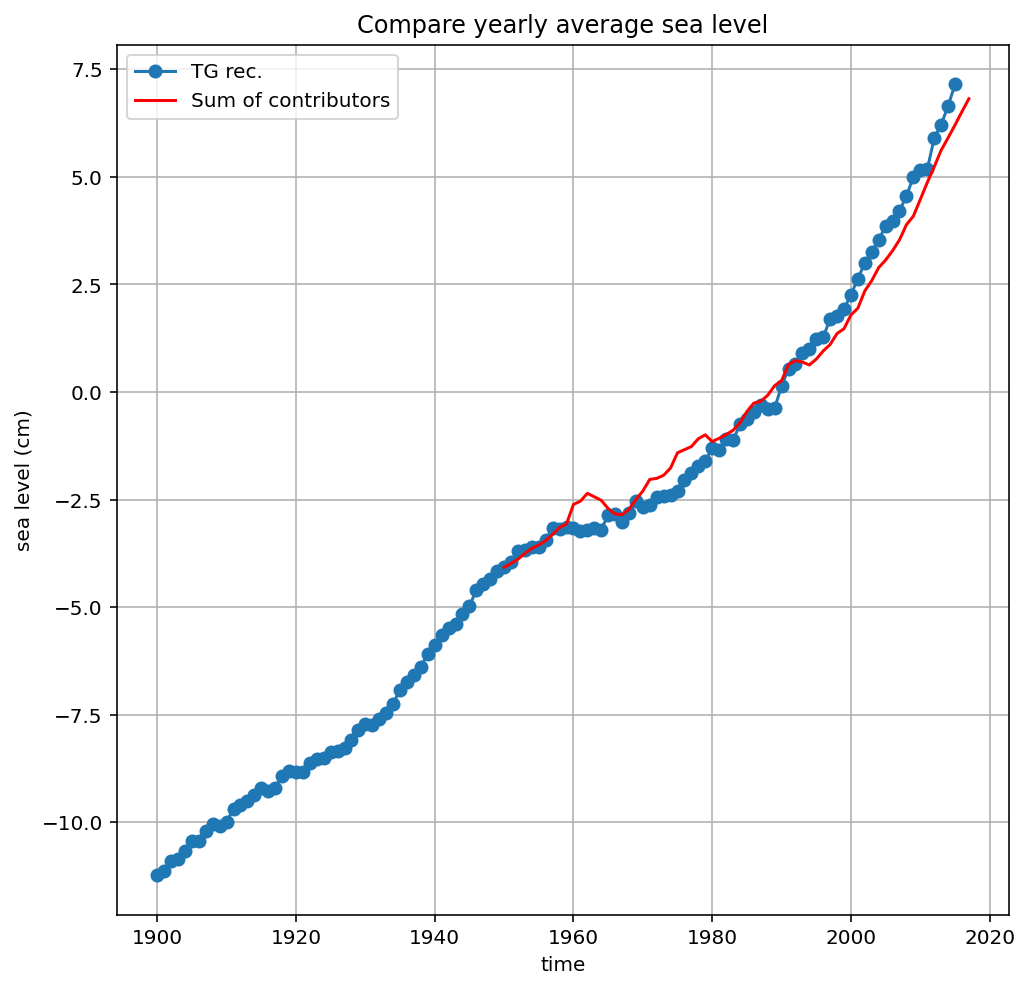

In [20]:
#Plot time series
fig, ax = plt.subplots(figsize=(8,8))
ax.plot(GloSLDang19_df - GloSLDang19_df.loc[1953:2018].mean(), 'o-', label='TG rec.')
ax.plot(sealevel_df.Total - sealevel_df.Total.mean() , 'r-', label='Sum of contributors')

#ax.set_aspect(1)
#ax.set_xlim([ys,2020])
plt.xlabel('time')
plt.ylabel('sea level (cm)')
plt.title('Compare yearly average sea level')
ax.grid(True)
plt.legend(loc='upper left')

The sum of contributors is not high enough compared to the reconstruction. Could missing glaciers and deep ocean fill the gap?
Deep ocean OHC increase is around 5% of the top 2000m (Zanna et al. 2019 consistent with Gebbie et al. 2019) . This is not enough to bridge the gap.

### Using Frederikse et al. 2020 data

In [85]:
fts = pd.read_excel('../data/Frederikse2020/global_basin_timeseries.xlsx', sheet_name='Global')
fts = fts.rename(columns = {fts.columns[0]:'time'})
fts = fts.set_index('time')
fts.index = fts.index +0.5
fts

,Observed GMSL [lower],Observed GMSL [mean],Observed GMSL [upper],Sum of contributors [lower],Sum of contributors [mean],Sum of contributors [upper],Steric [lower],Steric [mean],Steric [upper],Glaciers [lower],...,Reservoir impoundment [upper],Groundwater depletion [lower],Groundwater depletion [mean],Groundwater depletion [upper],Natural TWS [lower],Natural TWS [mean],Natural TWS [upper],Altimetry [lower],Altimetry [mean],Altimetry [upper]
time,,,,,,,,,,,,,,,,,,,,,
1900.5,-203.557267,-173.261442,-141.002807,-199.227905,-173.090775,-146.755371,-58.666306,-48.279350,-37.552917,-95.500000,...,34.349998,-16.549999,-12.482123,-8.20,-3.90,-2.063471,0.0,NaN,NaN,NaN
1901.5,-201.018509,-168.801675,-135.897609,-195.460754,-170.245468,-144.462433,-58.755146,-49.144897,-38.849602,-94.599998,...,34.349998,-16.500000,-12.455986,-8.20,-1.25,0.809499,3.0,NaN,NaN,NaN
1902.5,-212.074044,-180.389967,-148.213824,-193.369812,-168.421829,-142.791672,-59.155018,-49.877560,-39.888828,-93.500000,...,34.299999,-16.500000,-12.428749,-8.15,0.00,2.109289,4.4,NaN,NaN,NaN
1903.5,-202.697564,-170.267832,-138.930518,-193.189880,-168.557556,-143.225800,-60.985012,-51.100590,-40.815861,-92.849998,...,34.299999,-16.450001,-12.399526,-8.15,0.00,2.142349,4.6,NaN,NaN,NaN
1904.5,-200.167015,-168.720071,-137.450122,-193.112183,-168.372360,-142.754593,-62.585712,-52.240177,-41.379253,-91.800003,...,34.299999,-16.400000,-12.370537,-8.10,-0.30,1.730843,4.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2014.5,3.502924,11.868936,20.258065,10.868380,12.164775,13.248381,4.308544,4.670032,5.028707,2.450000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.597370,12.316882,15.094145
2015.5,9.216259,17.869521,26.591747,18.938299,20.688692,22.158627,5.933526,6.744699,7.239516,3.200000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20.347687,23.342237,26.391973
2016.5,15.510550,23.941862,32.672989,21.122080,23.292170,25.237761,5.686140,6.472463,7.420359,3.850000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22.668184,25.728231,28.832306


In [108]:
# Read the AR5 sea level projections
path_ar5_proj = '~/Projects/Project_ProbSLR/Data_Proj/Data_AR5/Final_Projections/'

for idx, SCE in enumerate(['rcp45_sumlower', 'rcp45_summid', 'rcp45_sumupper']):
    ar5_proj = xr.open_dataset(f'{path_ar5_proj}{SCE}.nc')
    if idx == 0:
        ar5_proj_df = pd.DataFrame({'time': 2006.5 + np.arange(len(ar5_proj.time))})

    ar5_proj_df[f'{SCE}'] = ar5_proj.global_average_sea_level_change

ar5_proj_df = ar5_proj_df.set_index('time')
ar5_proj_df = ar5_proj_df*100 # Convert from m to cm


In [109]:
ar5_proj_df

,rcp45_sumlower,rcp45_summid,rcp45_sumupper
time,,,
2006.5,0.986662,1.725490,2.464319
2007.5,1.207504,2.081027,2.954551
2008.5,1.412243,2.451441,3.490639
2009.5,1.585076,2.816955,4.048834
2010.5,1.814932,3.200009,4.585087
...,...,...,...
2095.5,37.369370,52.511639,67.653908
2096.5,37.858021,53.199585,68.541145
2097.5,38.353218,53.915398,69.477585


In [110]:
comp_df = fts[['Observed GMSL [lower]', 'Observed GMSL [mean]', 'Observed GMSL [upper]']]
comp_df = comp_df - comp_df['Observed GMSL [mean]'].loc[1986:2006].mean()
comp_df = comp_df/10 #Convert from mm to cm
comp_df = pd.concat([comp_df, ar5_proj_df], axis=1, join='outer')
comp_df

,Observed GMSL [lower],Observed GMSL [mean],Observed GMSL [upper],rcp45_sumlower,rcp45_summid,rcp45_sumupper
time,,,,,,
1900.5,-16.039829,-13.010247,-9.784383,NaN,NaN,NaN
1901.5,-15.785954,-12.564270,-9.273864,NaN,NaN,NaN
1902.5,-16.891507,-13.723099,-10.505485,NaN,NaN,NaN
1903.5,-15.953859,-12.710886,-9.577154,NaN,NaN,NaN
1904.5,-15.700804,-12.556110,-9.429115,NaN,NaN,NaN
...,...,...,...,...,...,...
2095.5,NaN,NaN,NaN,37.369370,52.511639,67.653908
2096.5,NaN,NaN,NaN,37.858021,53.199585,68.541145
2097.5,NaN,NaN,NaN,38.353218,53.915398,69.477585


<AxesSubplot:xlabel='time'>

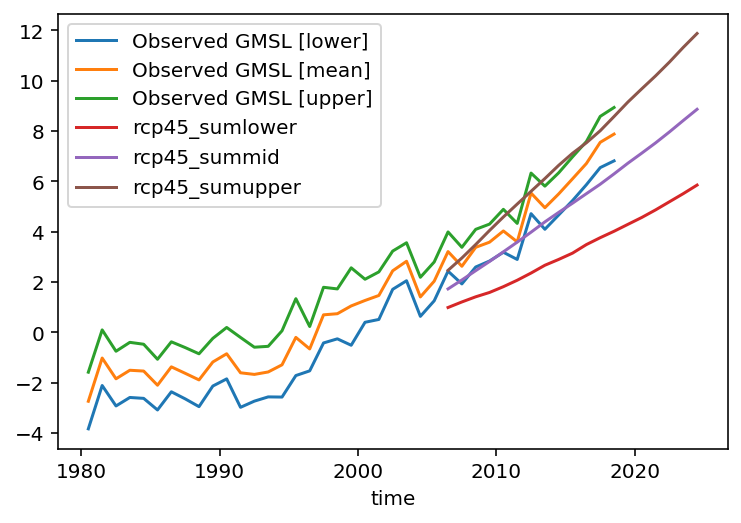

In [111]:
comp_df.loc[1980:2025].plot()
#comp_df.plot()

### Make the comparison process by process